<a href="https://colab.research.google.com/github/Pentuhov/PR.AI-1/blob/main/%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B9_%D1%81%D0%BB%D0%BE%D0%B9_(Dense)_%D0%94%D0%97_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание

Самостоятельно напишите нейронную сеть, которая может стать составной частью системы бота для игры в "Крестики-нолики". Используя подготовленную базу изображений, создайте и обучите нейронную сеть, распознающую две категории изображений: крестики и нолики. Добейтесь точности распознавания более 95% (accuracy)


In [ ]:
# Подключение класса для создания нейронной сети прямого распространения
from tensorflow.keras.models import Sequential
# Подключение класса для создания полносвязного слоя
from tensorflow.keras.layers import Dense
# Подключение оптимизатора
from tensorflow.keras.optimizers import Adam
# Подключение утилит для to_categorical
from tensorflow.keras import utils
# Подключение библиотеки для загрузки изображений
from tensorflow.keras.preprocessing import image
# Подключение библиотеки для работы с массивами
import numpy as np
# Подключение модуля для работы с файлами
import os
# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt
from PIL import Image
# Вывод изображения в ноутбуке, а не в консоли или файле
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
%matplotlib inline

In [ ]:
# Загрузка датасета из облака
import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l3/hw_pro.zip', None, quiet=True)

'hw_pro.zip'

In [ ]:
# Распаковываем архив hw_light.zip в папку hw_light
!unzip -q hw_pro.zip

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [ ]:
# Путь к директории с базой
base_dir = r'C:\Users\Terion\Основы нейронных сетей\Лаб 1\hw_pro'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                         target_size=(img_height, img_width),
                                                         color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        else:
            y_train.append(1)
# Преобразование в numpy-массив загруженных изображений и меток классов
x_train = np.array(x_train)
y_train = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train', x_train.shape)
print('Размер массива y_train', y_train.shape)

Размер массива x_train (102, 20, 20, 1)
Размер массива y_train (102,)


In [ ]:
# Создание модели нейронной сети
model = Sequential()

In [ ]:
# Добавление свёрточного слоя
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 1)))
# Добавление слоя пулинга
model.add(MaxPooling2D(pool_size=(2, 2)))
# Добавление второго свёрточного слоя
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Добавление второго слоя пулинга
model.add(MaxPooling2D(pool_size=(2, 2)))
# Преобразование двумерных данных в одномерные перед подачей на полносвязный слой
model.add(Flatten())
# Добавление полносвязного слоя с 128 нейронами и функцией активации ReLU
model.add(Dense(128, activation='relu'))
# Добавление выходного слоя с двумя нейронами (по одному на каждый класс) и функцией активации softmax
model.add(Dense(2, activation='softmax'))

In [ ]:
# Компиляция модели с выбором оптимизатора, функции потерь и метрики
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Обучение модели на подготовленных данных
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.5259 - loss: 32.9317 - val_accuracy: 0.4286 - val_loss: 8.8858
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.6335 - loss: 4.8536 - val_accuracy: 0.6667 - val_loss: 2.7509
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9015 - loss: 0.5151 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9200 - loss: 0.2712 - val_accuracy: 1.0000 - val_loss: 2.5012e-04
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9837 - loss: 0.0493 - val_accuracy: 0.7619 - val_loss: 0.8196
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9083 - loss: 0.1684 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 1.5383e-06
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9821 - loss: 0.0249 - val_accuracy: 1.0000 - val

In [ ]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающий и тестовый наборы
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [ ]:
# Оценка точности модели на тестовых данных
accuracy = model.evaluate(x_test, y_test)[1]
print("Accuracy: {:.2f}%".format(accuracy * 100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 1.0000 - loss: 6.1971e-05
Accuracy: 100.00%


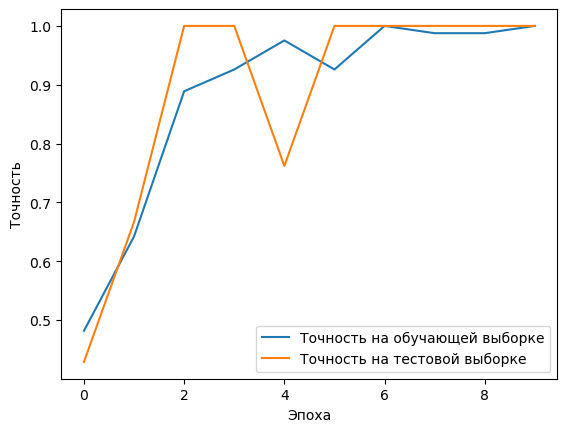

In [ ]:
plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Точность на тестовой выборке')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()